# Item-Based Collaborating 

## Step 1: Import Relevant Libraries

In [18]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Step 2: Importing datastets

In [19]:
ratings_df=pd.read_csv('ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [20]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [21]:
movies_df = pd.read_csv('movie.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Step 3: Merging datasets on moviedID column

In [22]:
df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')
df

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99338,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
99339,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
99340,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
99341,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Romance


## Step 4: Exploratory Data Analysis (EDA)

In [24]:
aggregate_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

agg_ratings_MT50 = aggregate_ratings[aggregate_ratings['number_of_ratings']>50]

agg_ratings_MT50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 15 to 8737
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              444 non-null    object 
 1   mean_rating        444 non-null    float64
 2   number_of_ratings  444 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.9+ KB


In [25]:
# Check popular movies
agg_ratings_MT50.sort_values(by='number_of_ratings', ascending=False)

,title,mean_rating,number_of_ratings
2874,Forrest Gump (1994),4.054252,341
6262,Pulp Fiction (1994),4.256173,324
6941,"Shawshank Redemption, The (1994)",4.487138,311
7020,"Silence of the Lambs, The (1991)",4.138158,304
7336,Star Wars: Episode IV - A New Hope (1977),4.221649,291
...,...,...,...
1138,Bowfinger (1999),3.068627,51
5115,Mighty Aphrodite (1995),3.637255,51
4139,"Jerk, The (1979)",3.696078,51
950,"Birds, The (1963)",3.754902,51


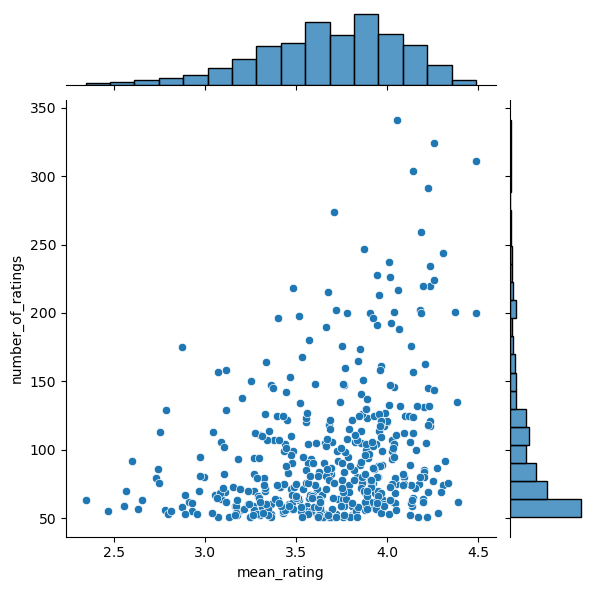

In [26]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_MT50)

In [27]:
# Merge data
df_MT100 = pd.merge(df, agg_ratings_MT50[['title']], on='title', how='inner')
df_MT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42633 entries, 0 to 42632
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     42633 non-null  int64  
 1   movieId    42633 non-null  int64  
 2   rating     42633 non-null  float64
 3   timestamp  42633 non-null  int64  
 4   title      42633 non-null  object 
 5   genres     42633 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.0+ MB


## Step 5: Create Matrix of Movie-User and the values will be the ratings if not watched NAN

In [30]:
# Create movie-user matrix
matrix_movie_user = df_MT100.pivot_table(index='title', columns='userId', values='rating')
matrix_movie_user.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28 Days Later (2002),NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300 (2007),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 6: Data Normalization

In [32]:
# Normalize movie-user matrix
matrix_norm = matrix_movie_user.subtract(matrix_movie_user.mean(axis=1), axis = 0)
matrix_norm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.473684,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,0.113821,NaN,NaN,NaN,...,NaN,NaN,0.113821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28 Days Later (2002),NaN,NaN,NaN,NaN,0.192308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300 (2007),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.440678,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 7: Calculate Similarity Score

In [33]:
# Matrix using Pearson correlation
similarity_score= matrix_norm.T.corr()
similarity_score.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),About a Boy (2002),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),William Shakespeare's Romeo + Juliet (1996),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974)
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),1.000000,-0.210149,0.222436,-0.068151,-0.104619,-0.385591,-0.365527,-0.013833,0.596680,0.308892,...,0.193538,0.245277,0.197017,0.015799,0.049183,-0.179197,0.177226,-0.035737,0.335596,-0.045172
12 Angry Men (1957),-0.210149,1.000000,0.104729,0.361158,0.224537,0.263072,0.446791,-0.083251,0.323204,0.175803,...,0.225308,0.453054,0.059308,0.268298,0.407469,0.469118,0.055014,0.388298,0.255769,0.523983
2001: A Space Odyssey (1968),0.222436,0.104729,1.000000,-0.071055,0.034528,-0.009938,0.158227,-0.206524,0.230550,-0.232466,...,-0.517721,-0.136386,0.000000,0.119701,0.080504,0.183597,0.221392,-0.325544,-0.269838,0.285687
28 Days Later (2002),-0.068151,0.361158,-0.071055,1.000000,0.053525,-0.077845,0.308257,0.187546,0.030602,0.109572,...,0.442711,0.134044,0.240772,0.211554,-0.049029,0.229792,0.276815,0.115522,0.462065,0.952579
300 (2007),-0.104619,0.224537,0.034528,0.053525,1.000000,0.129896,0.208937,-0.468637,0.430155,0.308295,...,-0.067648,0.355501,0.482177,0.206330,-0.577350,-0.064455,0.650941,0.328437,0.123909,0.315576


In [34]:
# matrix using cosine similarity
cosine_score = cosine_similarity(matrix_norm.fillna(0))
cosine_score

array([[ 1.        , -0.01761255,  0.05516732, ..., -0.0169911 ,
         0.10671479, -0.01158062],
       [-0.01761255,  1.        ,  0.04857941, ...,  0.09725913,
         0.10456069,  0.08072039],
       [ 0.05516732,  0.04857941,  1.        , ..., -0.1039785 ,
        -0.05367487,  0.09042761],
       ...,
       [-0.0169911 ,  0.09725913, -0.1039785 , ...,  1.        ,
         0.03838416,  0.02936839],
       [ 0.10671479,  0.10456069, -0.05367487, ...,  0.03838416,
         1.        , -0.01898024],
       [-0.01158062,  0.08072039,  0.09042761, ...,  0.02936839,
        -0.01898024,  1.        ]])

## Step 8: Predict User's Rating For One Movie

In [43]:
# Pick a user ID
picked_userid = 3

# Pick a movie
picked_movie = 'Batman (1989)'

# Movies that the target user has watched
picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={picked_userid:'rating'})

picked_userid_watched.head(10)

,title,rating
0,Titanic (1997),1.167683
1,Requiem for a Dream (2000),1.130435
2,Forrest Gump (1994),0.945748
3,Fight Club (1999),0.821782
4,"Princess Bride, The (1987)",0.791411
5,"Shawshank Redemption, The (1994)",0.512862
6,Twister (1996),0.250000
7,Pulp Fiction (1994),0.243827
8,Saving Private Ryan (1998),0.054974
9,Braveheart (1995),0.054825


In [44]:
# Similarity score of the movie Batman with all the other movies
picked_movie_similarity_score = similarity_score[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})

# Rank the similarities between the movies user rated and Batman.
n = 5
picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                            right=picked_movie_similarity_score,
                                            on='title',
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False)[:5]

# Take a look at the User watched movies with highest similarity
picked_userid_watched_similarity

,title,rating,similarity_score
13,Batman (1989),-0.397959,1.000000
26,"Dark Knight, The (2008)",-1.235537,0.540793
15,V for Vendetta (2006),-0.513699,0.521388
17,Spider-Man (2002),-0.522388,0.485885
11,Men in Black (a.k.a. MIB) (1997),-0.163158,0.460651


In [45]:
# Calculate the predicted rating using weighted average of similarity scores and the ratings from user 1
predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                    weights=picked_userid_watched_similarity['similarity_score']), 6)

print(f'The predicted rating for {picked_movie} by user {picked_userid} is {predicted_rating}' )

The predicted rating for Batman (1989) by user 3 is -0.552709


## Step 9: Movie Recommendation

In [46]:
# Item-based recommendation function
def rec_func(picked_userid, number_of_similar_items, number_of_recommendations):
  import operator
  # Movies that the target user has not watched
  picked_userid_unwatched = pd.DataFrame(matrix_norm[picked_userid].isna()).reset_index()
  picked_userid_unwatched = picked_userid_unwatched[picked_userid_unwatched[picked_userid]==True]['title'].values.tolist()

  # Movies that the target user has watched
  picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=False))\
                            .reset_index()\
                            .rename(columns={picked_userid:'rating'})

  # Dictionary to save the unwatched movie and predicted rating pair
  rating_prediction ={}

  # Loop through unwatched movies
  for picked_movie in picked_userid_unwatched:
    # Calculate the similarity score of the picked movie iwth other movies
    picked_movie_similarity_score = similarity_score[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
    # Rank the similarities between the picked user watched movie and the picked unwatched movie.
    picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                                right=picked_movie_similarity_score,
                                                on='title',
                                                how='inner')\
                                        .sort_values('similarity_score', ascending=False)[:number_of_similar_items]
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from user 1
    predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                        weights=picked_userid_watched_similarity['similarity_score']), 3)
    # Save the predicted rating in the dictionary
    rating_prediction[picked_movie] = predicted_rating
    # Return the top recommended movies
  return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations
recommended_movie = rec_func(picked_userid=100, number_of_similar_items=5, number_of_recommendations =10)
recommended_movie

[('Eternal Sunshine of the Spotless Mind (2004)', 0.676),
 ('Star Trek (2009)', 0.56),
 ('40-Year-Old Virgin, The (2005)', 0.524),
 ('Eyes Wide Shut (1999)', 0.512),
 ('Prestige, The (2006)', 0.469),
 ('Fight Club (1999)', 0.449),
 ('Groundhog Day (1993)', 0.393),
 ('Trainspotting (1996)', 0.383),
 ('Seven (a.k.a. Se7en) (1995)', 0.363),
 ('Animal House (1978)', 0.357)]